In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données  olist_customers_dataset
xolist_customers_dataset = pd.read_csv('olist_customers_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_customers_dataset: ', xolist_customers_dataset.shape)
#xolist_customers_dataset.head(10)

forme des données olist_customers_dataset:  (99441, 5)


In [3]:
#  Données  olist_geolocation_dataset
xolist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_geolocation_dataset: ', xolist_geolocation_dataset.shape)
#xolist_geolocation_dataset.head(10)

forme des données olist_geolocation_dataset:  (1000163, 5)


In [4]:
#  Données  olist_order_items_dataset
xolist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_items_dataset: ', xolist_order_items_dataset.shape)
#xolist_order_items_dataset.head(10)

forme des données olist_order_items_dataset:  (112650, 7)


In [5]:
#  Données  olist_order_payments_dataset
xolist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_payments_dataset: ', xolist_order_payments_dataset.shape)
#xolist_order_payments_dataset.head(10)

forme des données olist_order_payments_dataset:  (103886, 5)


In [6]:
#  Données  olist_order_reviews_dataset
xolist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_reviews_dataset: ', xolist_order_reviews_dataset.shape)
#xolist_order_reviews_dataset.head(10)

forme des données olist_order_reviews_dataset:  (100000, 7)


In [7]:
#  Données  olist_orders_dataset
xolist_orders_dataset = pd.read_csv('olist_orders_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_orders_dataset: ', xolist_orders_dataset.shape)
#xolist_orders_dataset.head(10)

forme des données olist_orders_dataset:  (99441, 8)


In [8]:
#  Données d olist_products_dataset
xolist_products_dataset = pd.read_csv('olist_products_dataset.csv', sep = ',', low_memory=False )
#xtrain = convert_types(xtrain, print_info=True)
print('forme des données d olist_products_dataset: ', xolist_products_dataset.shape)
#xolist_products_dataset.head(10)

forme des données d olist_products_dataset:  (32951, 9)


In [9]:
# Fonctionnalités  des données olist_sellers_dataset
xolist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv', sep = ',', low_memory=False )

print('forme des fonctionnalités  des données olist_sellers_dataset: ', xolist_sellers_dataset.shape)
xolist_sellers_dataset.head(10)

forme des fonctionnalités  des données olist_sellers_dataset:  (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


# *          La présentation générale du jeu de données et nettoyage            *


In [10]:
#recherche de doublons
xolist_sellers_dataset.duplicated(subset=['seller_id']).sum()

0

In [11]:
#Permet d'obtenir la somme des NaN .
xolist_sellers_dataset.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Diagramme barre horizontale seller_state

Commentaire.



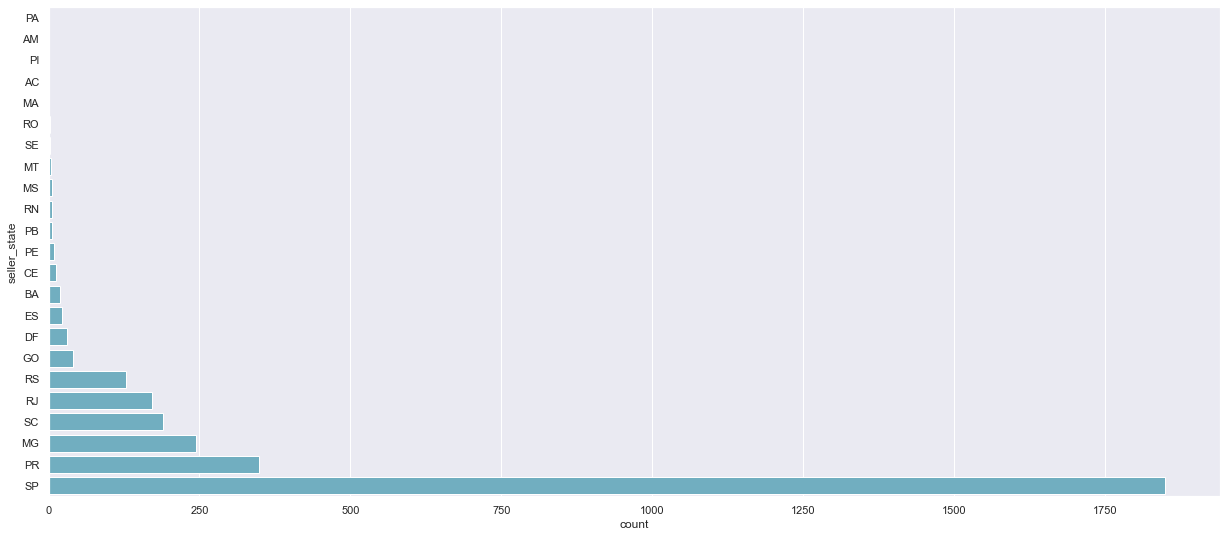

In [12]:
print ('Diagramme barre horizontale seller_state\n')
print('Commentaire.\n')
f, ax = plt.subplots(figsize=(21, 9))
sns.countplot(y="seller_state", data=xolist_sellers_dataset, order=xolist_sellers_dataset['seller_state'].value_counts().sort_values().index, color="c");

In [13]:
effectifs = xolist_sellers_dataset["seller_city"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["seller_city"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_sellers_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_sellers_dataset)*100 # len(data) renvoie la taille de l'échantillon
print(tab)

                                seller_city    n         f  pourcentage
0                                 sao paulo  694  0.224233    22.423263
1                                  curitiba  127  0.041034     4.103393
2                            rio de janeiro   96  0.031018     3.101777
3                            belo horizonte   68  0.021971     2.197092
4                            ribeirao preto   52  0.016801     1.680129
..                                      ...  ...       ...          ...
606  rio de janeiro, rio de janeiro, brasil    1  0.000323     0.032310
607                                 ibirite    1  0.000323     0.032310
608                            porto seguro    1  0.000323     0.032310
609                        uniao da vitoria    1  0.000323     0.032310
610                                  brejao    1  0.000323     0.032310

[611 rows x 4 columns]


In [14]:
effectifs = xolist_sellers_dataset["seller_state"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["seller_state"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_sellers_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_sellers_dataset)*100 # len(data) renvoie la taille de l'échantillon
print(tab)

   seller_state     n         f  pourcentage
0            SP  1849  0.597415    59.741519
1            PR   349  0.112763    11.276252
2            MG   244  0.078837     7.883683
3            SC   190  0.061389     6.138934
4            RJ   171  0.055250     5.525040
5            RS   129  0.041680     4.168013
6            GO    40  0.012924     1.292407
7            DF    30  0.009693     0.969305
8            ES    23  0.007431     0.743134
9            BA    19  0.006139     0.613893
10           CE    13  0.004200     0.420032
11           PE     9  0.002908     0.290792
12           PB     6  0.001939     0.193861
13           RN     5  0.001616     0.161551
14           MS     5  0.001616     0.161551
15           MT     4  0.001292     0.129241
16           SE     2  0.000646     0.064620
17           RO     2  0.000646     0.064620
18           AC     1  0.000323     0.032310
19           PI     1  0.000323     0.032310
20           AM     1  0.000323     0.032310
21        

### Jointure en zip_code_prefix de xolist_sellers_dataset et xolist_geolocation_dataset

In [15]:
xolist_sellers_dataset = xolist_sellers_dataset.rename(columns = {'seller_zip_code_prefix': 'zip_code_prefix'})
#xolist_sellers_dataset

In [16]:
xolist_geolocation_dataset = xolist_geolocation_dataset.rename(columns = {'geolocation_zip_code_prefix': 'zip_code_prefix'})
#xolist_geolocation_dataset

In [17]:
dataset_Sellers_merge1 = pd.merge(xolist_sellers_dataset, xolist_geolocation_dataset, how='inner', on=['zip_code_prefix'])
#dataset_Sellers_merge1

### Jointure en seller_id  de dataset_Sellers_merge1 et xolist_order_items_dataset

In [18]:
XSellers = pd.merge(dataset_Sellers_merge1, xolist_order_items_dataset, how='inner', on=['seller_id'])
XSellers

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16252414,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011130,-45.592347,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252415,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.013452,-45.584299,taubaté,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252416,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009155,-45.592019,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252417,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009019,-45.584925,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52


In [19]:
XSellers.describe()

,zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value
count,1.625242e+07,1.625242e+07,1.625242e+07,1.625242e+07,1.625242e+07,1.625242e+07
mean,2.642582e+04,-2.262922e+01,-4.733914e+01,1.198391e+00,1.185205e+02,1.989005e+01
std,2.604182e+04,2.425515e+00,2.309789e+00,6.833690e-01,1.741103e+02,1.508660e+01
min,1.001000e+03,-3.660537e+01,-6.788472e+01,1.000000e+00,8.500000e-01,0.000000e+00
25%,1.224300e+04,-2.357517e+01,-4.882996e+01,1.000000e+00,4.000000e+01,1.337000e+01
50%,1.494000e+04,-2.283870e+01,-4.720369e+01,1.000000e+00,7.490000e+01,1.632000e+01
75%,3.125500e+04,-2.174700e+01,-4.645098e+01,1.000000e+00,1.300000e+02,2.096000e+01
max,9.973000e+04,-2.484892e+00,-3.484769e+01,2.100000e+01,6.735000e+03,4.096800e+02


In [20]:
#recherche de doublons
XSellers.duplicated(subset=['seller_id','order_id']).sum()

16152629

In [21]:
#suppression de doublons en gardant le dernier
#XSellers=XSellers.drop_duplicates(subset=['seller_id','order_id'], keep='last')
#XSellers

In [22]:
#Permet d'obtenir la somme des NaN .
XSellers.isna().sum()

seller_id              0
zip_code_prefix        0
seller_city            0
seller_state           0
geolocation_lat        0
geolocation_lng        0
geolocation_city       0
geolocation_state      0
order_id               0
order_item_id          0
product_id             0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import datetime as dt
NOW = dt.datetime(2020,12,18)

In [25]:
NOW

datetime.datetime(2020, 12, 18, 0, 0)

In [26]:
XSellers

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16252414,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011130,-45.592347,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252415,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.013452,-45.584299,taubaté,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252416,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009155,-45.592019,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252417,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009019,-45.584925,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52


In [27]:
# Make the date_placed column datetime
XSellers['shipping_limit_date'] = pd.to_datetime(XSellers['shipping_limit_date'])

### RFM Récence Fréquence Montant

In [28]:
rfmTable = XSellers.groupby('seller_id').agg({'shipping_limit_date': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'price': lambda x: x.sum()}) # Monetary Value

rfmTable['shipping_limit_date'] = rfmTable['shipping_limit_date'].astype(int)
rfmTable.rename(columns={'shipping_limit_date': 'recency', 
                         'order_id': 'frequency', 
                         'price': 'monetary_value'}, inplace=True)

In [29]:
rfmTable.head(100)

,recency,frequency,monetary_value
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,1150,1056,945120.00
001cca7ae9ae17fb1caed9dfb1094831,882,11233,1178761.41
001e6ad469a905060d959994f1b41e4f,857,54,13500.00
002100f778ceb8431b7a1020ff7ab48f,974,15400,345660.00
003554e2dce176b5555353e4f3555ac8,1092,60,7200.00
...,...,...,...
07bf9669d84d1f11be443a9dd938f698,897,360,26640.00
07d75e33f2750d97d467fb57e4dfdd8a,946,80,28896.00
07de60b03d150fb3ea09eab5da5e4c8b,850,2574,205662.60


In [30]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [31]:
quantiles

,recency,frequency,monetary_value
0.25,849.0,216.0,18177.7050
0.50,882.0,735.0,79979.7500
0.75,1050.0,2837.5,335379.8475


In [32]:
quantiles = quantiles.to_dict()

In [33]:
quantiles

{'recency': {0.25: 849.0, 0.5: 882.0, 0.75: 1050.0},
 'frequency': {0.25: 216.0, 0.5: 735.0, 0.75: 2837.5},
 'monetary_value': {0.25: 18177.705,
  0.5: 79979.75000000001,
  0.75: 335379.84750000003}}

In [34]:
rfmSegmentation = rfmTable

In [35]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [36]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [37]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [38]:
rfmSegmentation.head(40)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
seller_id,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,1150,1056,945120.00,4,2,1,421
001cca7ae9ae17fb1caed9dfb1094831,882,11233,1178761.41,2,1,1,211
001e6ad469a905060d959994f1b41e4f,857,54,13500.00,2,4,4,244
002100f778ceb8431b7a1020ff7ab48f,974,15400,345660.00,3,1,1,311
003554e2dce176b5555353e4f3555ac8,1092,60,7200.00,4,4,4,444
004c9cd9d87a3c30c522c48c4fc07416,952,48620,5637835.06,3,1,1,311
00720abe85ba0859807595bbf045a33b,863,1144,44330.00,2,2,3,223
00ab3eff1b5192e5f1a63bcecfee11c8,1365,49,4802.00,4,4,4,444
00d8b143d12632bad99c0ad66ad52825,996,477,41022.00,3,3,3,333


In [39]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(30)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
seller_id,,,,,,,
4a3ca9315b744ce9f8e9374361493884,841,568282,57335255.12,1,1,1,111
46dc3b2cc0980fb8ec44634e21d2718e,849,169104,39970691.28,1,1,1,111
4869f7a5dfa277a7dca6462dcf3b52b2,841,196520,39010347.10,1,1,1,111
1f50f920176fa81dab994f9023523100,840,513646,28445829.86,1,1,1,111
fa1c13f2614d7b5c4749cbc52fecda94,836,85556,28330136.38,1,1,1,111
da8622b14eb17ae2831f4ac5b9dab84a,835,271425,28041399.75,1,1,1,111
7c67e1448b00f6e969d365cea6b010ab,843,189596,26121420.71,1,1,1,111
7d13fca15225358621be4086e1eb0964,836,97682,19203295.93,1,1,1,111
cca3071e3e9bb7d12640c9fbe2301306,841,237380,18306828.54,1,1,1,111


In [40]:
XSellers.to_csv('XSellers.csv', index = False)

In [41]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in XSellers.columns:
    if XSellers[col].dtype == 'object':
        XSellers[col] = labelencoder.fit_transform(XSellers[col])

XSellers.head()

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,618,13023,101,22,-22.898536,-47.063125,131,21,28714,1,32844,2017-08-25 20:50:19,106.2,9.56
1,618,13023,101,22,-22.898536,-47.063125,131,21,42120,1,31415,2017-05-11 16:25:11,101.7,15.92
2,618,13023,101,22,-22.898536,-47.063125,131,21,72469,2,6532,2017-09-05 12:50:19,10.8,2.42
3,618,13023,101,22,-22.895499,-47.061944,131,21,28714,1,32844,2017-08-25 20:50:19,106.2,9.56
4,618,13023,101,22,-22.895499,-47.061944,131,21,42120,1,31415,2017-05-11 16:25:11,101.7,15.92


In [42]:
X10 = XSellers.values

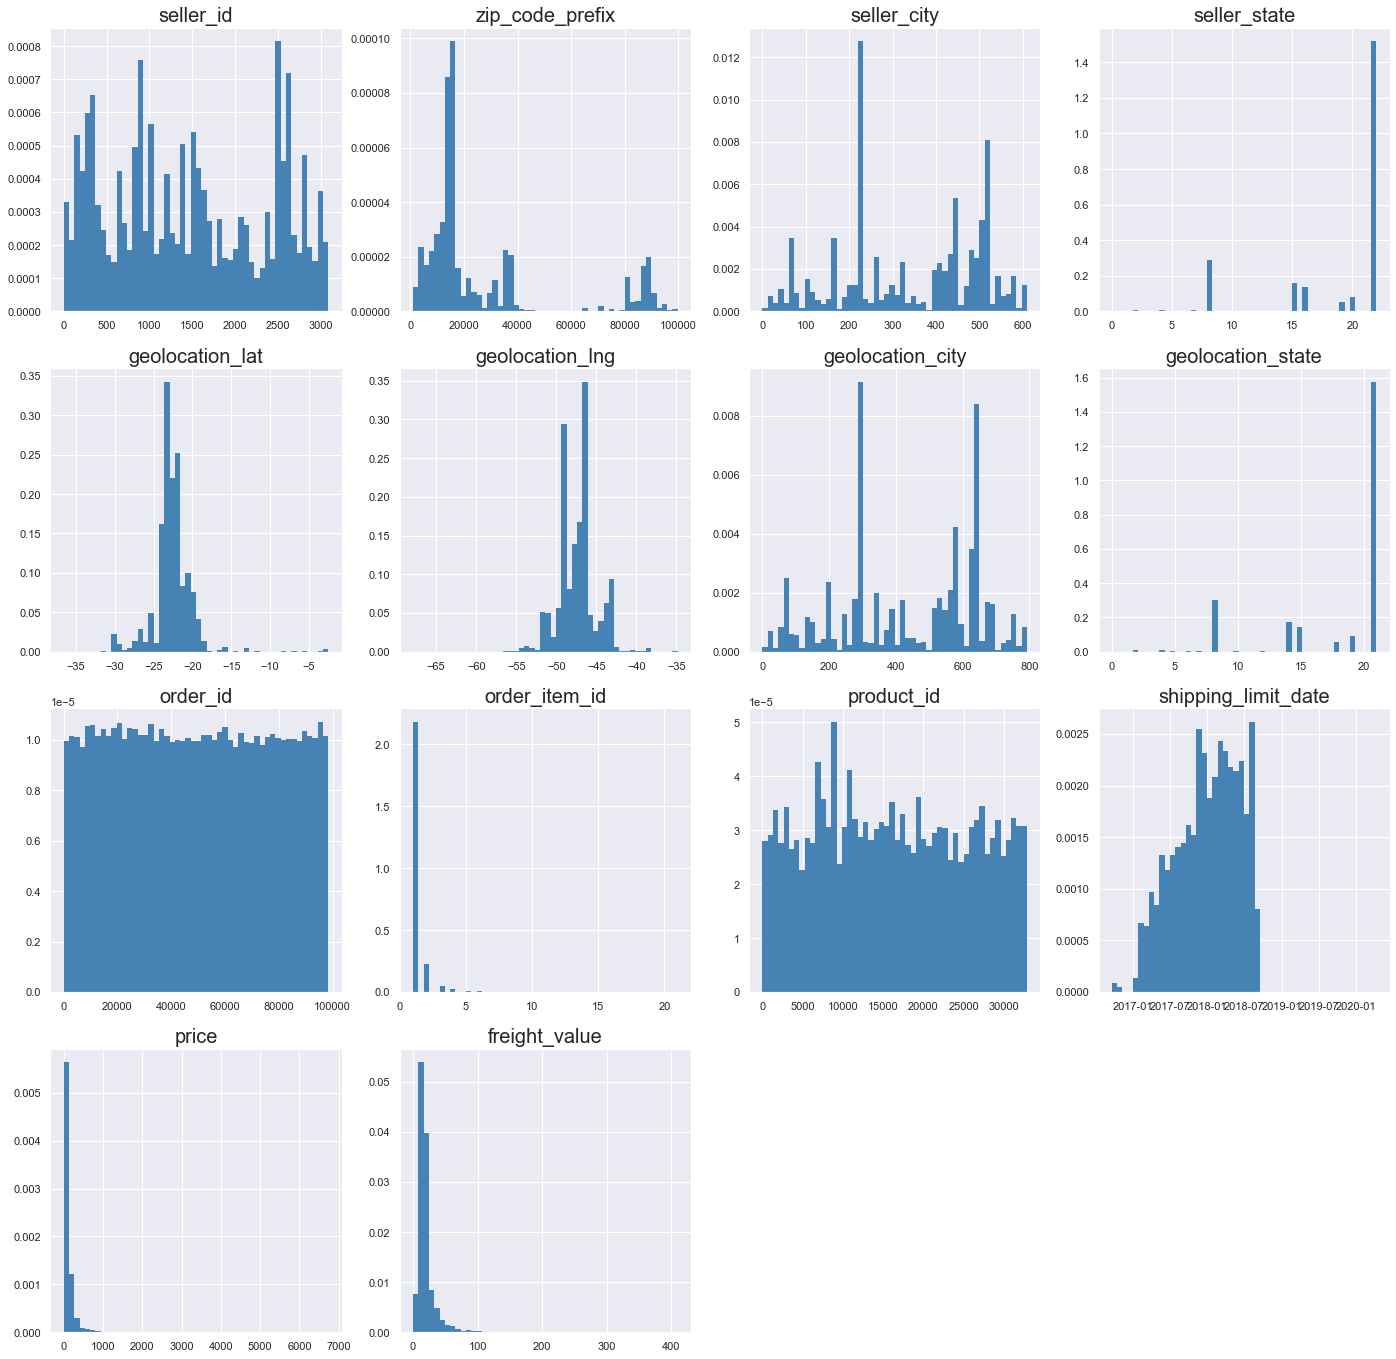

In [43]:
fig = plt.figure(figsize=(24, 24))
for feat_idx in range(X10.shape[1]):
    ax = fig.add_subplot(4,4, (feat_idx+1))
    ax.set_title(XSellers.columns[feat_idx], fontdict={'fontsize': 20, 'fontweight': 'medium'})
    
    h = ax.hist(X10[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')